In [ ]:
import numpy as np
import lightgbm as lgm
import pandas as pd

In [ ]:
hapdat = pd.read_csv("/content/happiness2.csv")

In [ ]:
hapdat.columns

Index(['Unnamed: 0', 'country', 'region', 'score_2015', 'GDPperCapita_2015',
       'socialSupport_2015', 'healthyLifeExp_2015', 'freedom_2015',
       'corruptionPerception_2015', 'generosity_2015', 'score_2016',
       'GDPperCapita_2016', 'socialSupport_2016', 'healthyLifeExp_2016',
       'freedom_2016', 'corruptionPerception_2016', 'generosity_2016',
       'score_2017', 'GDPperCapita_2017', 'socialSupport_2017',
       'healthyLifeExp_2017', 'freedom_2017', 'generosity_2017',
       'corruptionPerception_2017', 'score_2018', 'GDPperCapita_2018',
       'socialSupport_2018', 'healthyLifeExp_2018', 'freedom_2018',
       'generosity_2018', 'corruptionPerception_2018', 'score_2019',
       'GDPperCapita_2019', 'socialSupport_2019', 'healthyLifeExp_2019',
       'freedom_2019', 'generosity_2019', 'corruptionPerception_2019', 'fold'],
      dtype='object')

In [ ]:
hapdat = hapdat.drop(['Unnamed: 0'], axis = 1)

In [ ]:
hapdat.columns

Index(['country', 'region', 'score_2015', 'GDPperCapita_2015',
       'socialSupport_2015', 'healthyLifeExp_2015', 'freedom_2015',
       'corruptionPerception_2015', 'generosity_2015', 'score_2016',
       'GDPperCapita_2016', 'socialSupport_2016', 'healthyLifeExp_2016',
       'freedom_2016', 'corruptionPerception_2016', 'generosity_2016',
       'score_2017', 'GDPperCapita_2017', 'socialSupport_2017',
       'healthyLifeExp_2017', 'freedom_2017', 'generosity_2017',
       'corruptionPerception_2017', 'score_2018', 'GDPperCapita_2018',
       'socialSupport_2018', 'healthyLifeExp_2018', 'freedom_2018',
       'generosity_2018', 'corruptionPerception_2018', 'score_2019',
       'GDPperCapita_2019', 'socialSupport_2019', 'healthyLifeExp_2019',
       'freedom_2019', 'generosity_2019', 'corruptionPerception_2019', 'fold'],
      dtype='object')

In [ ]:
cols = list(hapdat)
for i in range(len(cols)):
  print(i, cols[i])

0 country
1 region
2 score_2015
3 GDPperCapita_2015
4 socialSupport_2015
5 healthyLifeExp_2015
6 freedom_2015
7 corruptionPerception_2015
8 generosity_2015
9 score_2016
10 GDPperCapita_2016
11 socialSupport_2016
12 healthyLifeExp_2016
13 freedom_2016
14 corruptionPerception_2016
15 generosity_2016
16 score_2017
17 GDPperCapita_2017
18 socialSupport_2017
19 healthyLifeExp_2017
20 freedom_2017
21 generosity_2017
22 corruptionPerception_2017
23 score_2018
24 GDPperCapita_2018
25 socialSupport_2018
26 healthyLifeExp_2018
27 freedom_2018
28 generosity_2018
29 corruptionPerception_2018
30 score_2019
31 GDPperCapita_2019
32 socialSupport_2019
33 healthyLifeExp_2019
34 freedom_2019
35 generosity_2019
36 corruptionPerception_2019
37 fold


In [ ]:
cols[7], cols[8] = cols[8], cols[7]
cols[14], cols[15] = cols[15], cols[14]
for i in range(len(cols)):
  print(i, cols[i])



0 country
1 region
2 score_2015
3 GDPperCapita_2015
4 socialSupport_2015
5 healthyLifeExp_2015
6 freedom_2015
7 generosity_2015
8 corruptionPerception_2015
9 score_2016
10 GDPperCapita_2016
11 socialSupport_2016
12 healthyLifeExp_2016
13 freedom_2016
14 generosity_2016
15 corruptionPerception_2016
16 score_2017
17 GDPperCapita_2017
18 socialSupport_2017
19 healthyLifeExp_2017
20 freedom_2017
21 generosity_2017
22 corruptionPerception_2017
23 score_2018
24 GDPperCapita_2018
25 socialSupport_2018
26 healthyLifeExp_2018
27 freedom_2018
28 generosity_2018
29 corruptionPerception_2018
30 score_2019
31 GDPperCapita_2019
32 socialSupport_2019
33 healthyLifeExp_2019
34 freedom_2019
35 generosity_2019
36 corruptionPerception_2019
37 fold


In [ ]:
hapdat = hapdat[cols]

In [ ]:
hapdat.columns

Index(['country', 'region', 'score_2015', 'GDPperCapita_2015',
       'socialSupport_2015', 'healthyLifeExp_2015', 'freedom_2015',
       'generosity_2015', 'corruptionPerception_2015', 'score_2016',
       'GDPperCapita_2016', 'socialSupport_2016', 'healthyLifeExp_2016',
       'freedom_2016', 'generosity_2016', 'corruptionPerception_2016',
       'score_2017', 'GDPperCapita_2017', 'socialSupport_2017',
       'healthyLifeExp_2017', 'freedom_2017', 'generosity_2017',
       'corruptionPerception_2017', 'score_2018', 'GDPperCapita_2018',
       'socialSupport_2018', 'healthyLifeExp_2018', 'freedom_2018',
       'generosity_2018', 'corruptionPerception_2018', 'score_2019',
       'GDPperCapita_2019', 'socialSupport_2019', 'healthyLifeExp_2019',
       'freedom_2019', 'generosity_2019', 'corruptionPerception_2019', 'fold'],
      dtype='object')

In [ ]:
hotregions = pd.get_dummies(hapdat.region, prefix='region')

In [ ]:
hotregions

,region_Asia,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_Latin America and Caribbean,region_Middle East and North Africa,region_Sub-Saharan Africa,region_Western Europe and NA ANZ
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
163,0,0,0,1,0,0,0
164,1,0,0,0,0,0,0
165,0,0,0,0,1,0,0
166,0,0,0,0,0,1,0


In [ ]:
hapdat

,country,region,score_2015,GDPperCapita_2015,socialSupport_2015,healthyLifeExp_2015,freedom_2015,generosity_2015,corruptionPerception_2015,score_2016,...,generosity_2018,corruptionPerception_2018,score_2019,GDPperCapita_2019,socialSupport_2019,healthyLifeExp_2019,freedom_2019,generosity_2019,corruptionPerception_2019,fold
0,Afghanistan,Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,3.360,...,0.191,0.036,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
1,Albania,Central and Eastern Europe,4.959,0.87867,0.80434,0.81325,0.35733,0.14272,0.06413,4.655,...,0.149,0.032,4.719,0.947,0.848,0.874,0.383,0.178,0.027,0
2,Algeria,Middle East and North Africa,5.605,0.93929,1.07772,0.61766,0.28579,0.07822,0.17383,6.355,...,0.055,0.135,5.211,1.002,1.160,0.785,0.086,0.073,0.114,0
3,Angola,Sub-Saharan Africa,4.033,0.75778,0.86040,0.16683,0.10384,0.12344,0.07122,3.866,...,0.079,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Argentina,Latin America and Caribbean,6.574,1.05351,1.24823,0.78723,0.44974,0.11451,0.08484,6.650,...,0.062,0.054,6.086,1.092,1.432,0.881,0.471,0.066,0.050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela,Latin America and Caribbean,6.810,1.04424,1.25596,0.72052,0.42908,0.05841,0.11069,6.084,...,0.056,0.052,4.707,0.960,1.427,0.805,0.154,0.064,0.047,0
164,Vietnam,Asia,5.360,0.63216,0.91226,0.74676,0.59444,0.16860,0.10441,5.061,...,0.177,0.079,5.175,0.741,1.346,0.851,0.543,0.147,0.073,0
165,Yemen,Middle East and North Africa,4.077,0.54649,0.68093,0.40064,0.35571,0.09131,0.07854,3.724,...,0.083,0.064,3.380,0.287,1.163,0.463,0.143,0.108,0.077,0
166,Zambia,Sub-Saharan Africa,5.129,0.47038,0.91612,0.29924,0.48827,0.19591,0.12468,4.795,...,0.221,0.082,4.107,0.578,1.058,0.426,0.431,0.247,0.087,0


In [ ]:
hapdat = pd.concat([hapdat, hotregions], axis=1)

In [ ]:
hapdat

,country,region,score_2015,GDPperCapita_2015,socialSupport_2015,healthyLifeExp_2015,freedom_2015,generosity_2015,corruptionPerception_2015,score_2016,...,generosity_2019,corruptionPerception_2019,fold,region_Asia,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_Latin America and Caribbean,region_Middle East and North Africa,region_Sub-Saharan Africa,region_Western Europe and NA ANZ
0,Afghanistan,Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,3.360,...,0.158,0.025,0,1,0,0,0,0,0,0
1,Albania,Central and Eastern Europe,4.959,0.87867,0.80434,0.81325,0.35733,0.14272,0.06413,4.655,...,0.178,0.027,0,0,1,0,0,0,0,0
2,Algeria,Middle East and North Africa,5.605,0.93929,1.07772,0.61766,0.28579,0.07822,0.17383,6.355,...,0.073,0.114,0,0,0,0,0,1,0,0
3,Angola,Sub-Saharan Africa,4.033,0.75778,0.86040,0.16683,0.10384,0.12344,0.07122,3.866,...,NaN,NaN,0,0,0,0,0,0,1,0
4,Argentina,Latin America and Caribbean,6.574,1.05351,1.24823,0.78723,0.44974,0.11451,0.08484,6.650,...,0.066,0.050,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela,Latin America and Caribbean,6.810,1.04424,1.25596,0.72052,0.42908,0.05841,0.11069,6.084,...,0.064,0.047,0,0,0,0,1,0,0,0
164,Vietnam,Asia,5.360,0.63216,0.91226,0.74676,0.59444,0.16860,0.10441,5.061,...,0.147,0.073,0,1,0,0,0,0,0,0
165,Yemen,Middle East and North Africa,4.077,0.54649,0.68093,0.40064,0.35571,0.09131,0.07854,3.724,...,0.108,0.077,0,0,0,0,0,1,0,0
166,Zambia,Sub-Saharan Africa,5.129,0.47038,0.91612,0.29924,0.48827,0.19591,0.12468,4.795,...,0.247,0.087,0,0,0,0,0,0,1,0


In [ ]:
hapdat[hapdat['country'] == "Switzerland"].values

array([['Switzerland', 'Western Europe and NA ANZ', 7.587, 1.39651,
        1.34951, 0.94143, 0.66557, 0.29678, 0.41978, 7.509, 1.52733,
        1.14524, 0.86303, 0.58557, 0.28083, 0.41203, 7.49399995803833,
        1.56497955322266, 1.51691174507141, 0.858131289482117,
        0.620070576667786, 0.290549278259277, 0.367007285356522, 7.487,
        1.42, 1.549, 0.927, 0.66, 0.256, 0.357, 7.48, 1.452, 1.526,
        1.052, 0.572, 0.263, 0.343, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=object)

In [ ]:
hapdat.iloc[0].region

'Asia'

In [ ]:
hotregions.columns

Index(['region_Asia', 'region_Central and Eastern Europe',
       'region_Commonwealth of Independent States',
       'region_Latin America and Caribbean',
       'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
       'region_Western Europe and NA ANZ'],
      dtype='object')

In [ ]:
staticcolerithingers = list(hotregions.columns)
staticcolerithingers.append('fold')
shiftycolerithingers = ['score', 'GDPperCapita', 'socialSupport', 'healthyLifeExp', 'freedom', 'generosity', 'corruptionPerception']
labelithingers = list(hotregions.columns)+['fold', 'score', 'GDPperCapita', 'socialSupport', 'healthyLifeExp', 'freedom', 'generosity', 'corruptionPerception', 'year', 'target']


everythingingthing = []
for i in range(len(hapdat)):
  row = hapdat.iloc[i]
  for year in range(2015, 2019):
    tr = "score_"+str(year)
    ta = "score_"+str(year+1)
    if(row[tr] > 0 and row[ta] > 0):
  
      datavec = np.zeros(len(staticcolerithingers) + len(shiftycolerithingers) + 2)

      for j in range(len(staticcolerithingers)):
        datavec[j] = row[staticcolerithingers[j]]

      for j in range(len(shiftycolerithingers)):
        stringalong = shiftycolerithingers[j] + "_" + str(year)
        datavec[len(staticcolerithingers)+j] = row[stringalong]

      strung = "score_"+str(year+1)
      datavec[-1] = row[strung]
      datavec[-2] = year
    
      everythingingthing.append(datavec)




In [ ]:
len(everythingingthing)/168

3.5833333333333335

In [ ]:
everythingingthing[0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5750e+00, 3.1982e-01,
       3.0285e-01, 3.0335e-01, 2.3414e-01, 3.6510e-01, 9.7190e-02,
       2.0150e+03, 3.3600e+00])

In [ ]:
everythingingthing[1]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.36000000e+00, 3.82270000e-01, 1.10370000e-01, 1.73440000e-01,
       1.64300000e-01, 3.12680000e-01, 7.11200000e-02, 2.01600000e+03,
       3.79399991e+00])

In [ ]:
bahhumbug = np.array(everythingingthing)

In [ ]:
bahhumbug.shape

(602, 17)

In [ ]:
len(labelithingers)

17

In [ ]:
labelithingers

['region_Asia',
 'region_Central and Eastern Europe',
 'region_Commonwealth of Independent States',
 'region_Latin America and Caribbean',
 'region_Middle East and North Africa',
 'region_Sub-Saharan Africa',
 'region_Western Europe and NA ANZ',
 'fold',
 'score',
 'GDPperCapita',
 'socialSupport',
 'healthyLifeExp',
 'freedom',
 'generosity',
 'corruptionPerception',
 'year',
 'target']

In [ ]:
bahhumbug.shape

(602, 17)

In [ ]:
inframe = pd.DataFrame(bahhumbug[:, 0:16], columns=labelithingers[:16])
outtie = pd.DataFrame(bahhumbug[:, -1], columns=[labelithingers[-1]])

In [ ]:
inframe.shape, outtie.shape

((602, 16), (602, 1))

In [ ]:
inframe.shape, outtie.shape

((602, 16), (602, 1))

In [ ]:
inframe.head()

,region_Asia,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_Latin America and Caribbean,region_Middle East and North Africa,region_Sub-Saharan Africa,region_Western Europe and NA ANZ,fold,score,GDPperCapita,socialSupport,healthyLifeExp,freedom,generosity,corruptionPerception,year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,2015.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2016.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2017.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2018.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.959,0.878670,0.804340,0.813250,0.35733,0.142720,0.064130,2015.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
inframe.iloc[0]

region_Asia                                     1.00000
region_Central and Eastern Europe               0.00000
region_Commonwealth of Independent States       0.00000
region_Latin America and Caribbean              0.00000
region_Middle East and North Africa             0.00000
region_Sub-Saharan Africa                       0.00000
region_Western Europe and NA ANZ                0.00000
fold                                            0.00000
score                                           3.57500
GDPperCapita                                    0.31982
socialSupport                                   0.30285
healthyLifeExp                                  0.30335
freedom                                         0.23414
generosity                                      0.36510
corruptionPerception                            0.09719
year                                         2015.00000
Name: 0, dtype: float64

In [ ]:
outtie[:10]

,target
0,3.360
1,3.794
2,3.632
3,3.203
4,4.655
5,4.644
6,4.586
7,4.719
8,6.355
9,5.872


In [ ]:
hapdat.iloc[0]

country                                      Afghanistan
region                                              Asia
score_2015                                         3.575
GDPperCapita_2015                                0.31982
socialSupport_2015                               0.30285
healthyLifeExp_2015                              0.30335
freedom_2015                                     0.23414
generosity_2015                                   0.3651
corruptionPerception_2015                        0.09719
score_2016                                          3.36
GDPperCapita_2016                                0.38227
socialSupport_2016                               0.11037
healthyLifeExp_2016                              0.17344
freedom_2016                                      0.1643
generosity_2016                                  0.31268
corruptionPerception_2016                        0.07112
score_2017                                         3.794
GDPperCapita_2017              

In [ ]:
inframe.head()

,region_Asia,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_Latin America and Caribbean,region_Middle East and North Africa,region_Sub-Saharan Africa,region_Western Europe and NA ANZ,fold,score,GDPperCapita,socialSupport,healthyLifeExp,freedom,generosity,corruptionPerception,year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,2015.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2016.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2017.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2018.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.959,0.878670,0.804340,0.813250,0.35733,0.142720,0.064130,2015.0


In [ ]:
outtie.head()

,target
0,3.360
1,3.794
2,3.632
3,3.203
4,4.655


In [ ]:
len(outtie.values)

602

In [ ]:
len(inframe['score'].values)

602

In [ ]:
outtie['target'] = outtie["target"] - inframe["score"]

In [ ]:
outtie.head()

,target
0,-0.215
1,0.434
2,-0.162
3,-0.429
4,-0.304


In [ ]:
outtie['target'] = outtie["target"] + inframe["score"]

In [ ]:
#checking some baseline shite

mean_squared_error(inframe['score'].values, outtie.values)

0.039361236914165265

In [ ]:
inframe.isnull().values.any()

True

In [ ]:
inframe = inframe.fillna(0)

In [ ]:
outtie.isnull().values.any()

False

In [ ]:
outtie = outtie.fillna(0)

In [ ]:
outtie.isnull().values.any()

False

In [ ]:
inframe.columns

Index(['region_Asia', 'region_Central and Eastern Europe',
       'region_Commonwealth of Independent States',
       'region_Latin America and Caribbean',
       'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
       'region_Western Europe and NA ANZ', 'fold', 'score', 'GDPperCapita',
       'socialSupport', 'healthyLifeExp', 'freedom', 'generosity',
       'corruptionPerception', 'year'],
      dtype='object')

In [ ]:
subinframe = inframe[['score', 'GDPperCapita',
       'socialSupport', 'healthyLifeExp', 'freedom', 'generosity',
       'corruptionPerception']]

In [ ]:
subinframe.head()

,score,GDPperCapita,socialSupport,healthyLifeExp,freedom,generosity,corruptionPerception
0,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,4.959,0.878670,0.804340,0.813250,0.35733,0.142720,0.064130


In [ ]:
maemaes = []
models = []

for i in range(1):
  xtrain, xval, ytrain, yval = train_test_split(inframe[inframe['fold'] == 0], outtie[inframe['fold'] == 0],  test_size=0.2)

  xtest, ytest = inframe[inframe['fold'] == 1], outtie[inframe['fold'] == 1]

  lgb_train = lgm.Dataset(xtrain, ytrain)
  lgb_eval = lgm.Dataset(xval, yval)
  lgb_test = lgm.Dataset(xtest, ytest)

  # specify your configurations as a dict
  params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'metric': 'l2',
      'num_leaves': 32,
      'learning_rate': 0.005,
      'feature_fraction': 1,
      'verbose': -100,
      'extra_trees': True
  }

  print('Starting training...')
  # train
  gbm = lgm.train(params,
                  lgb_train,
                  num_boost_round=20000,
                  valid_sets=lgb_eval,
                  callbacks=[lgm.early_stopping(stopping_rounds=5, verbose=0)])

  preds = gbm.predict(xtest)

  maemaes.append(mean_squared_error(preds, ytest))
  models.append(gbm)

Starting training...
[1]	valid_0's l2: 1.11299
[2]	valid_0's l2: 1.10235
[3]	valid_0's l2: 1.09182
[4]	valid_0's l2: 1.0814
[5]	valid_0's l2: 1.07108
[6]	valid_0's l2: 1.06086
[7]	valid_0's l2: 1.05075
[8]	valid_0's l2: 1.04073
[9]	valid_0's l2: 1.03082
[10]	valid_0's l2: 1.02101
[11]	valid_0's l2: 1.01129
[12]	valid_0's l2: 1.00168
[13]	valid_0's l2: 0.992148
[14]	valid_0's l2: 0.982719
[15]	valid_0's l2: 0.973379
[16]	valid_0's l2: 0.964132
[17]	valid_0's l2: 0.954966
[18]	valid_0's l2: 0.945903
[19]	valid_0's l2: 0.93692
[20]	valid_0's l2: 0.928038
[21]	valid_0's l2: 0.919238
[22]	valid_0's l2: 0.910533
[23]	valid_0's l2: 0.901904
[24]	valid_0's l2: 0.893373
[25]	valid_0's l2: 0.884927
[26]	valid_0's l2: 0.876554
[27]	valid_0's l2: 0.868276
[28]	valid_0's l2: 0.860075
[29]	valid_0's l2: 0.851996
[30]	valid_0's l2: 0.84393
[31]	valid_0's l2: 0.836012
[32]	valid_0's l2: 0.828123
[33]	valid_0's l2: 0.820363
[34]	valid_0's l2: 0.812626
[35]	valid_0's l2: 0.805021
[36]	valid_0's l2: 0.79

In [ ]:
sum(maemaes)/len(maemaes)

0.03773303271644359

In [ ]:
np.var(np.array(maemaes))

0.00010611779246469207

In [ ]:
maemaes

[0.039700203141619046,
 0.0475085788519644,
 0.053137143499619996,
 0.04883660442991679,
 0.040515510628859525,
 0.032079809371186624,
 0.0503584971282029,
 0.02898484754618587,
 0.05466399941125848,
 0.05016645652494867,
 0.03811233985175521,
 0.03439164080683379,
 0.025915055886099,
 0.05251492705590325,
 0.05459404073524457,
 0.028252602559591077,
 0.06561303806331845,
 0.04284827751966271,
 0.04919755099552855,
 0.038390159468717086]

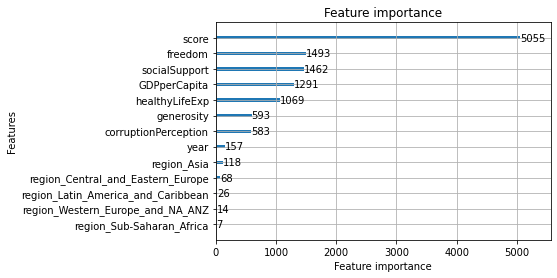

In [ ]:
lgm.plot_importance(models[0])

In [ ]:
colstoselect = xtrain.columns.values[-8:]
colstotarget = xtrain.columns.values[:-8]

In [ ]:
colstoselect, colstotarget

(array(['score', 'GDPperCapita', 'socialSupport', 'healthyLifeExp',
        'freedom', 'generosity', 'corruptionPerception', 'year'],
       dtype=object),
 array(['region_Asia', 'region_Central and Eastern Europe',
        'region_Commonwealth of Independent States',
        'region_Latin America and Caribbean',
        'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
        'region_Western Europe and NA ANZ'], dtype=object))

In [ ]:
xtrain_noregion = xtrain[colstoselect]
xval_noregion = xval[colstoselect]
xtest_noregion = xtest[colstoselect]

targtrain = xtrain[colstotarget]
targval = xval[colstotarget]
targtest = xtest[colstotarget]


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
targtrain[[targtrain.columns[0]]]

,region_Asia
157,0.0
8,0.0
325,0.0
247,0.0
188,0.0
...,...
450,0.0
15,0.0
425,0.0
246,0.0


In [ ]:
savedpreds = []
savedmodels = []

for i in range(len(targtrain.columns)):
  currentregion = []
  for j in range(20):

    xtrain, xtest, ytrain, ytest = train_test_split(inframe, outtie,  test_size=0.34)

    xval, xtest, yval, ytest = train_test_split(xtest, ytest,  test_size=0.5)

    lgb_train = lgm.Dataset(xtrain[colstoselect], xtrain[colstotarget][[targtrain.columns[i]]])
    lgb_eval = lgm.Dataset(xval[colstoselect], xval[colstotarget][[targval.columns[i]]])
    lgb_test = lgm.Dataset(xtest[colstoselect], xtest[colstotarget][[targtest.columns[i]]])

    # specify your configurations as a dict
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary',
        'num_leaves': 32,
        'learning_rate': 0.005,
        'feature_fraction': 1,
        'verbose': -100,
        'extra_trees': True
    }

    print('Starting training...')
    # train
    gbm = lgm.train(params,
                    lgb_train,
                    num_boost_round=5000,
                    valid_sets=lgb_eval,
                    callbacks=[lgm.early_stopping(stopping_rounds=5, verbose=0)])
    
    preds = gbm.predict(xtest_noregion)

    currentregion.append(roc_auc_score(targtest[[targtest.columns[i]]], preds))

    savedmodels.append(gbm)
  savedpreds.append(currentregion)

Streaming output truncated to the last 5000 lines.
[364]	valid_0's binary_logloss: 0.12837
[365]	valid_0's binary_logloss: 0.128226
[366]	valid_0's binary_logloss: 0.127913
[367]	valid_0's binary_logloss: 0.127774
[368]	valid_0's binary_logloss: 0.127464
[369]	valid_0's binary_logloss: 0.127324
[370]	valid_0's binary_logloss: 0.127017
[371]	valid_0's binary_logloss: 0.126879
[372]	valid_0's binary_logloss: 0.126745
[373]	valid_0's binary_logloss: 0.126441
[374]	valid_0's binary_logloss: 0.126306
[375]	valid_0's binary_logloss: 0.126005
[376]	valid_0's binary_logloss: 0.125875
[377]	valid_0's binary_logloss: 0.125577
[378]	valid_0's binary_logloss: 0.125445
[379]	valid_0's binary_logloss: 0.125314
[380]	valid_0's binary_logloss: 0.125019
[381]	valid_0's binary_logloss: 0.124893
[382]	valid_0's binary_logloss: 0.124602
[383]	valid_0's binary_logloss: 0.124474
[384]	valid_0's binary_logloss: 0.124351
[385]	valid_0's binary_logloss: 0.124062
[386]	valid_0's binary_logloss: 0.123937
[387]	v

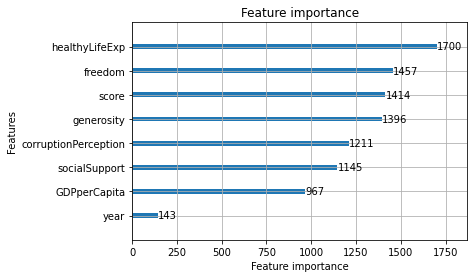

In [ ]:
lgm.plot_importance(savedmodels[0])

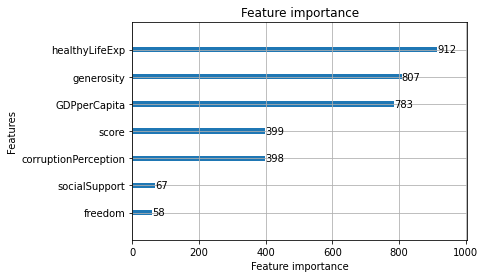

In [ ]:
lgm.plot_importance(savedmodels[-1])

In [ ]:
for i in range(len(savedpreds)):
  print(targtest.columns[i], sum(savedpreds[i])/len(savedpreds[i]), np.var(np.array(savedpreds[i])))

In [ ]:
savedpreds

[[0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428,
  0.9928571428571428],
 [0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624,
  0.9123931623931624],
 [0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA, FastICA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
import numpy as np

In [ ]:
subbert = inframe[colstoselect[:-1]]

In [ ]:
subbert.columns

Index(['score', 'GDPperCapita', 'socialSupport', 'healthyLifeExp', 'freedom',
       'generosity', 'corruptionPerception'],
      dtype='object')

In [ ]:
dattosnee_pd = subbert.values

labels = inframe[colstotarget]

In [ ]:
colstotarget

array(['region_Asia', 'region_Central and Eastern Europe',
       'region_Commonwealth of Independent States',
       'region_Latin America and Caribbean',
       'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
       'region_Western Europe and NA ANZ'], dtype=object)

In [ ]:
dattosnee.shape

(602, 8)

In [ ]:
type(dattosnee)

numpy.ndarray

In [ ]:
dattosnee = np.float32(dattosnee)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(dattosnee)

In [ ]:
X_embedded.shape

(602, 2)

In [ ]:
colorsvals = labels.values

In [ ]:
dippy = np.argmax(colorsvals, axis=1)
dippy.shape, dippy

((602,),
 array([0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 4, 4, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2,
        2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 2,
        2, 2, 2, 6, 6, 6, 6, 3, 3, 5, 5, 5, 5, 0, 0, 0, 0, 3, 3, 3, 3, 1,
        1, 1, 1, 5, 5, 5, 5, 3, 3, 3, 3, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5,
        5, 0, 0, 0, 0, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 3, 3, 3,
        3, 0, 0, 0, 0, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
        1, 1, 1, 1, 6, 6, 6, 6, 1, 1, 1, 1, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3,
        3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 5, 5, 5, 5, 6, 6, 6, 6,
        6, 6, 6, 6, 5, 5, 5, 5, 2, 2, 2, 2, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6,
        6, 6, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1,
        1, 1, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
        6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 5, 5, 5, 5, 3, 3, 3, 3, 0, 0,
        0, 0, 4, 4, 4, 4, 2, 2, 2, 2, 5, 5, 5, 5, 1, 1, 1, 1, 4, 4, 4, 4,
        2, 2, 2, 2, 0, 0, 1, 

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'TSNE Visualization of Clusters Labeled By Region')

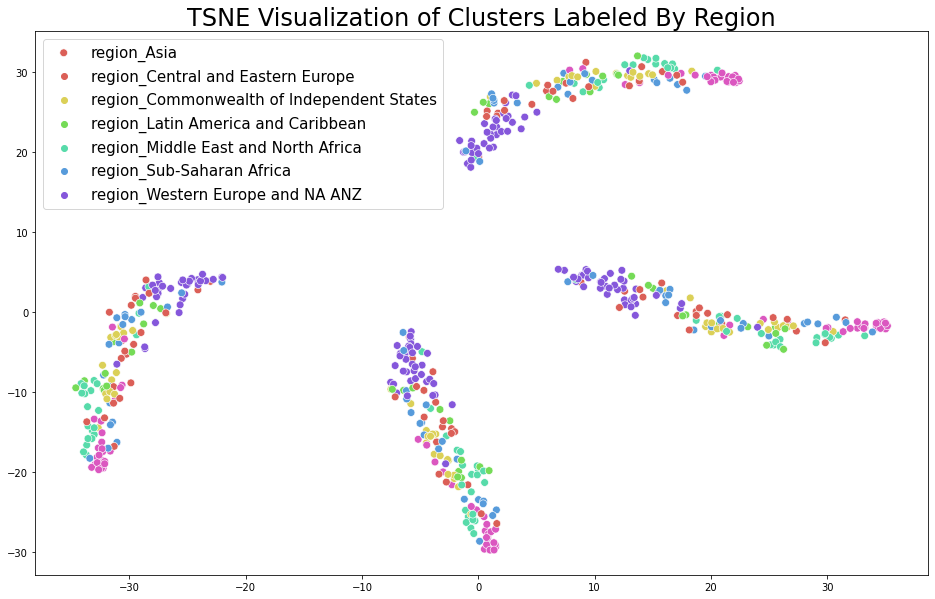

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x=X_embedded[:, 0], y=X_embedded[:, 1],
    hue=dippy,
    palette=sns.color_palette("hls", 7),
    s=60,
    legend="full",
    alpha=1
)
plt.legend(loc='upper left', fontsize=15, labels=['region_Asia', 'region_Central and Eastern Europe',
       'region_Commonwealth of Independent States',
       'region_Latin America and Caribbean',
       'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
       'region_Western Europe and NA ANZ'])

plt.title("TSNE Visualization of Clusters Labeled By Region", fontsize=24)


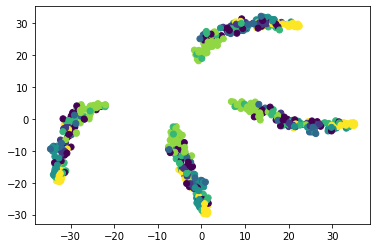

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=dippy)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if sys.path[0] == '':


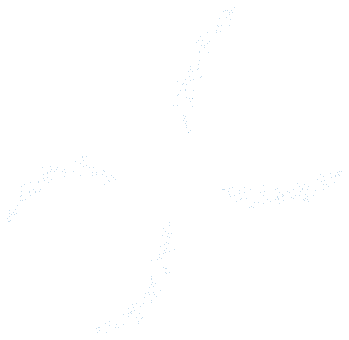

In [ ]:
def plot_tsne(xy, colors=None, alpha=0.25, figsize=(6,6), s=0.5, cmap='hsv'):
    plt.figure(figsize=figsize, facecolor='white')
    plt.margins(0)
    plt.axis('off')
    fig = plt.scatter(xy[:,0], xy[:,1],
                c=colors, # set colors of markers
                cmap=cmap, # set color map of markers
                alpha=alpha, # set alpha of markers
                marker=',', # use smallest available marker (square)
                s=s, # set marker size. single pixel is 0.5 on retina, 1.0 otherwise
                lw=0, # don't use edges
                edgecolor='') # don't use edges
    # remove all axes and whitespace / borders
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
plot_tsne(X_embedded)

In [ ]:
!pip install --quiet optuna
import optuna
best_score = 999
training_rounds = 10000

# Declare how we evaluate how good a set of hyperparameters are, i.e.
# declare an objective function.
def objective(trial):
    # Specify a search space using distributions across plausible values of hyperparameters.

    param = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'l1',
        'num_leaves': 32,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'min_data_in_leaf': 3,
        'learning_rate': trial.suggest_uniform('feature_fraction', 0.0001, 0.001),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': 1,
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'verbose': -100
    }
    
    # Run LightGBM for the hyperparameter values
    gbm = lgm.train(params,
                lgb_train,
                num_boost_round=20000,
                valid_sets=lgb_eval,
                callbacks=[lgm.early_stopping(stopping_rounds=20, verbose=0)])

    preds = gbm.predict(xtest)

    
    
    cv_score = mean_absolute_error(preds, ytest)
    if cv_score<best_score:
        training_rounds = 20000
    
    # Return metric of interest
    return cv_score

# Suppress information only outputs - otherwise optuna is 
# quite verbose, which can be nice, but takes up a lot of space
optuna.logging.set_verbosity(optuna.logging.WARNING) 

# We search for another 4 hours (3600 s are an hours, so timeout=14400).
# We could instead do e.g. n_trials=1000, to try 1000 hyperparameters chosen 
# by optuna or set neither timeout or n_trials so that we keep going until 
# the user interrupts ("Cancel run").
study = optuna.create_study(direction='minimize')  
study.enqueue_trial(params)
study.optimize(objective, timeout=1000) 

In [ ]:
study.best_params